<a href="https://colab.research.google.com/github/jayasrikumar14/data-science-/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
!pip install keras
!pip install tensorflow
import tensorflow as tf
!pip install yahoo-finance
!pip install matplotlib
!pip install pydot
!pip install yfinance
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
!pip install graphviz
import graphviz
import pydot

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
import keras.backend as k
from keras.callbacks import EarlyStopping
#from keras.optimizers import adam
from keras.models import load_model
#from keras.utils.vis_utils import plot_model


import yfinance as yf

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacem

In [ ]:
df = yf.download('AMZN', start='2010-01-01', end='2022-01-31')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...
2022-01-24,139.000000,144.945007,135.352005,144.544006,144.544006,155624000
2022-01-25,142.242493,143.600006,138.145004,139.985992,139.985992,90824000
2022-01-26,144.750000,145.184998,137.318497,138.872498,138.872498,95602000


In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])

#Selecting the Features
features = df[['Open','High','Low','Volume']]

In [ ]:
#Splitting to Training set and Test set
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(features):
        X_train, X_test = features[:len(train_index)], features[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [ ]:
scaler = MinMaxScaler()
fitter  = scaler.fit(X_train)

X_train = fitter.transform(X_train)
X_test = fitter.transform(X_test)

In [ ]:
#Process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
#plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
346/346 [==============================] - 2s 2ms/step - loss: 2505.9558
Epoch 2/100
346/346 [==============================] - 1s 2ms/step - loss: 1518.1949
Epoch 3/100
346/346 [==============================] - 1s 2ms/step - loss: 782.4565
Epoch 4/100
346/346 [==============================] - 1s 2ms/step - loss: 377.9515
Epoch 5/100
346/346 [==============================] - 1s 2ms/step - loss: 223.1726
Epoch 6/100
346/346 [==============================] - 1s 2ms/step - loss: 155.6255
Epoch 7/100
346/346 [==============================] - 1s 2ms/step - loss: 98.9045
Epoch 8/100
346/346 [==============================] - 1s 2ms/step - loss: 52.9675
Epoch 9/100
346/346 [==============================] - 1s 2ms/step - loss: 23.6581
Epoch 10/100
346/346 [==============================] - 1s 2ms/step - loss: 9.6887
Epoch 11/100
346/346 [==============================] - 1s 2ms/step - loss: 4.4481
Epoch 12/100
346/346 [==============================] - 1s 2ms/step - loss: 2.6

In [ ]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

9/9 [==============================] - 0s 2ms/step


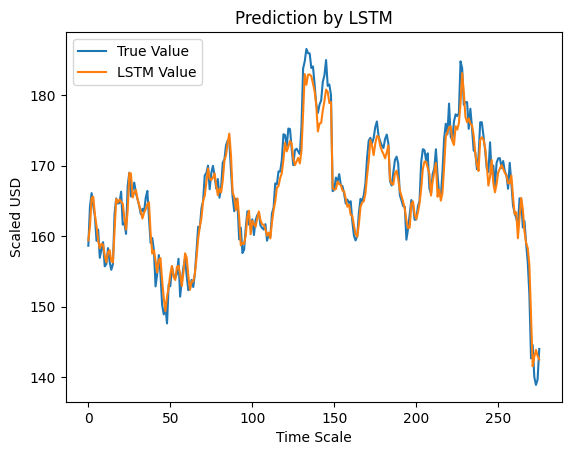

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()